## Problem Statement

- For companies to become competitive and skyrocket their growth, they need to leverage AI/ML to develop their predictive models to forecast sales in the future.


- Predective models attempt at forecasting future sales based on historical data whaile taking into account seasonality  effects,demand,holiday,promotions and competations


- As an aspring Datascientist in the sales department and the sales team provided you with the data for 1115 stores


- The objective is to predict future daily sales based on the given features

In [1]:
# importing Libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {border: 1px  black solid !important;  color: black !important;
}
</style>

In [3]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# importing datetime library
import datetime

In [6]:
sales_train_df = pd.read_csv("train.csv")

In [7]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
# Checking tail of data

In [9]:
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [10]:
# info 
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
# using describe
sales_train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [12]:
sales_train_df["Customers"].max()

7388

In [13]:
sales_train_df[sales_train_df["Customers"] == 7388]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993496,817,2,2013-01-22,27190,7388,1,1,0,0


In [14]:
#importing store dataset
store_df = pd.read_csv("store.csv")

In [15]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [16]:
print(len(store_df))

1115


In [17]:
store_df.shape

(1115, 10)

In [18]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [19]:
store_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


In [20]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Exploring Dataset

In [21]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<AxesSubplot:>

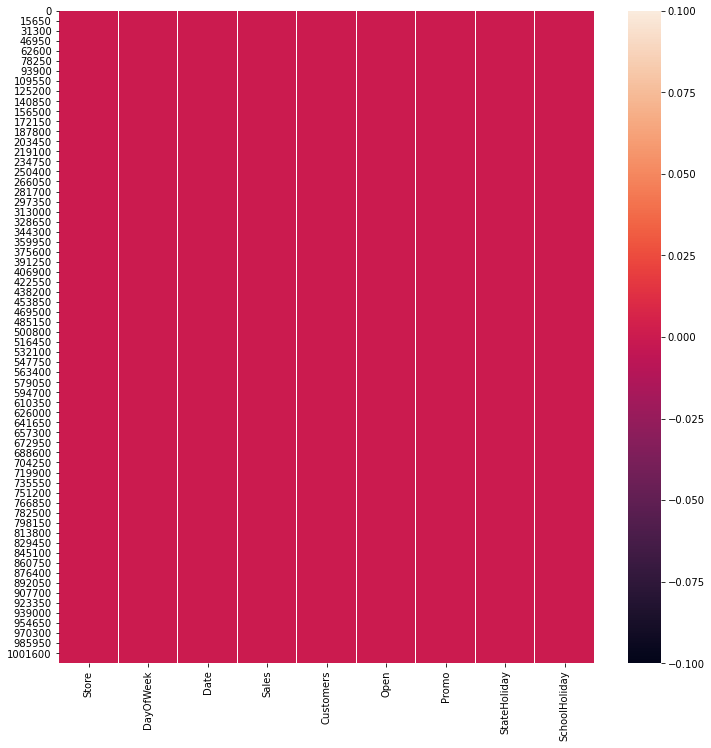

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(data=sales_train_df.isnull())

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

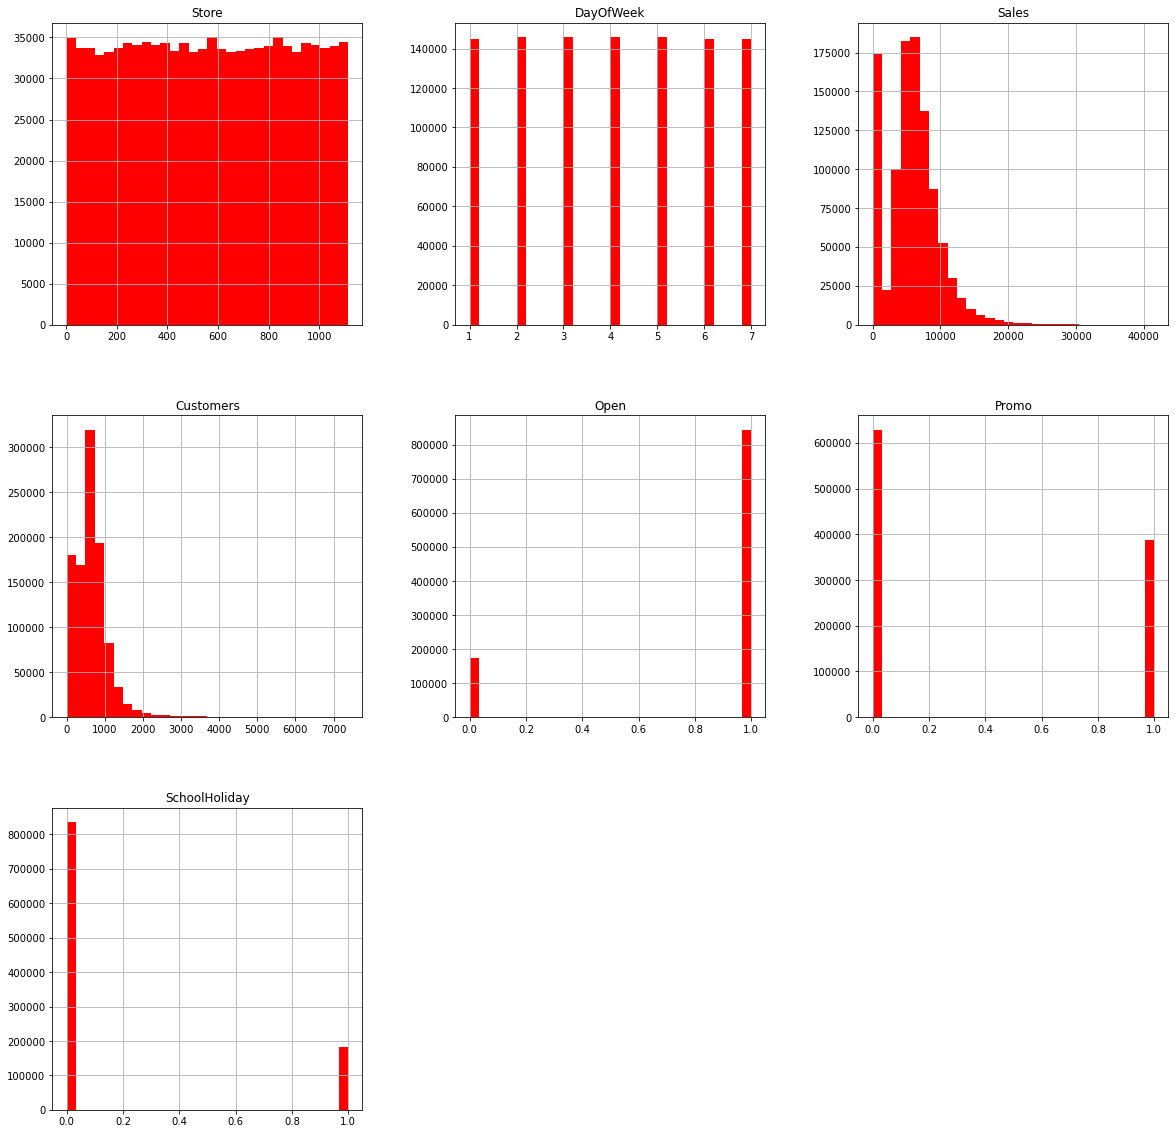

In [23]:
sales_train_df.hist(bins=30,figsize=(20,20),color="r")

In [24]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [25]:
sales_train_df["Open"].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [26]:
closed_stores = sales_train_df[sales_train_df["Open"] == 0]
open_stores = sales_train_df[sales_train_df["Open"] == 1]

In [27]:
print("Total ====>",len(sales_train_df["Open"]))
print("\n")
print("Closed stores ====>",len(closed_stores))
print("\n")
print("Open stores ====>",len(open_stores))

Total ====> 1017209


Closed stores ====> 172817


Open stores ====> 844392


In [28]:
sales_train_df = sales_train_df[sales_train_df["Open"] == 1]

In [29]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [30]:
sales_train_df = sales_train_df.drop("Open",axis=1)

In [31]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [32]:
sales_train_df.shape

(844392, 8)

In [33]:
sales_train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,844392.0,558.422920,321.731914,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844392.0,3.520361,1.723689,1.0,2.0,3.0,5.0,7.0
Sales,844392.0,6955.514291,3104.214680,0.0,4859.0,6369.0,8360.0,41551.0
Customers,844392.0,762.728395,401.227674,0.0,519.0,676.0,893.0,7388.0
Promo,844392.0,0.446352,0.497114,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,844392.0,0.193580,0.395103,0.0,0.0,0.0,0.0,1.0


In [34]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<AxesSubplot:>

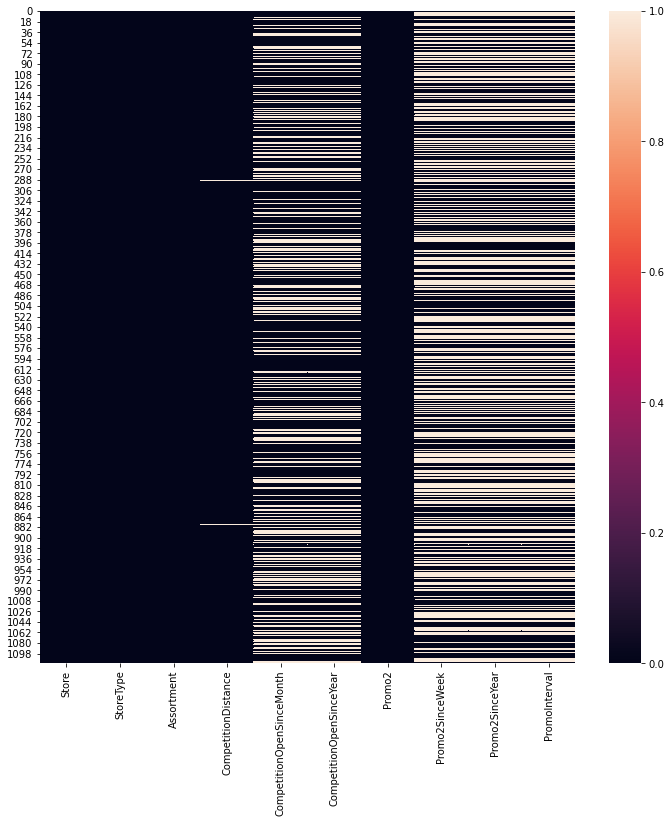

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(data=store_df.isnull())

In [36]:
store_df["CompetitionDistance"].describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [37]:
store_df["CompetitionDistance"].median()

2325.0

In [38]:
store_df["CompetitionDistance"] = store_df["CompetitionDistance"].fillna(2325.0)

In [39]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [40]:
store_df["CompetitionOpenSinceMonth"].mode()

0    9.0
dtype: float64

In [41]:
store_df["CompetitionOpenSinceMonth"] = store_df["CompetitionOpenSinceMonth"].fillna(9.0)

In [42]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [43]:
store_df["CompetitionOpenSinceYear"].mode()

0    2013.0
dtype: float64

In [44]:
store_df["CompetitionOpenSinceYear"] = store_df["CompetitionOpenSinceYear"].fillna(2013.0)

In [45]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [46]:
store_df["Promo2SinceWeek"].describe()

count    571.000000
mean      23.595447
std       14.141984
min        1.000000
25%       13.000000
50%       22.000000
75%       37.000000
max       50.000000
Name: Promo2SinceWeek, dtype: float64

In [47]:
store_df["Promo2SinceWeek"] = store_df["Promo2SinceWeek"].fillna(23.595447)

In [48]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [49]:
store_df["Promo2SinceYear"].mode()

0    2011.0
dtype: float64

In [50]:
store_df["Promo2SinceYear"] = store_df["Promo2SinceYear"].fillna(2011.0)

In [51]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                544
dtype: int64

In [52]:
store_df["PromoInterval"]

0                    NaN
1        Jan,Apr,Jul,Oct
2        Jan,Apr,Jul,Oct
3                    NaN
4                    NaN
              ...       
1110     Jan,Apr,Jul,Oct
1111                 NaN
1112                 NaN
1113                 NaN
1114    Mar,Jun,Sept,Dec
Name: PromoInterval, Length: 1115, dtype: object

In [53]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.000000,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.000000,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,23.595447,2011.0,NaN
4,5,a,a,29910.0,4.0,2015.0,0,23.595447,2011.0,NaN


In [54]:
store_df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [55]:
store_df = store_df.drop("PromoInterval",axis=1)

In [56]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
dtype: int64

<AxesSubplot:>

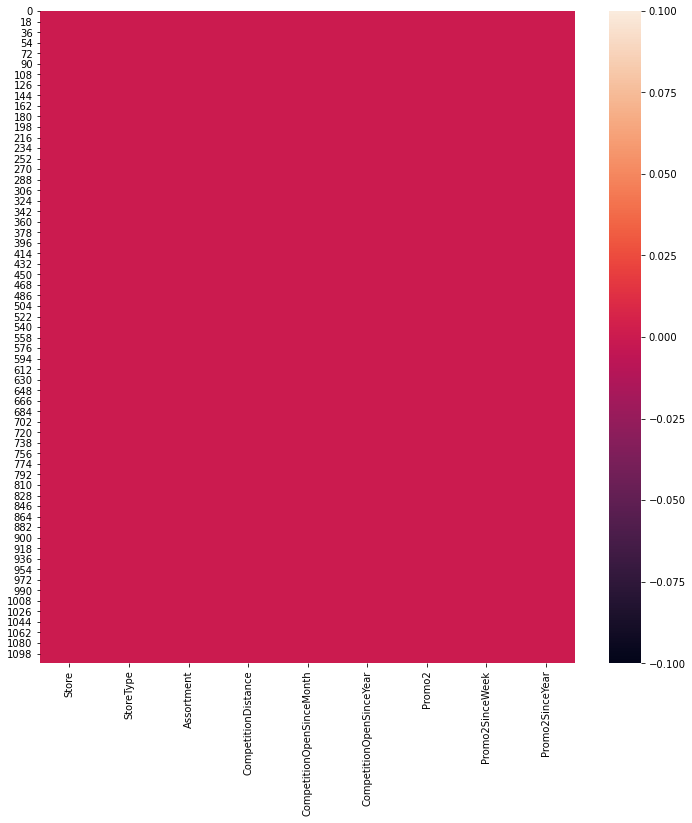

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(data=store_df.isnull())

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

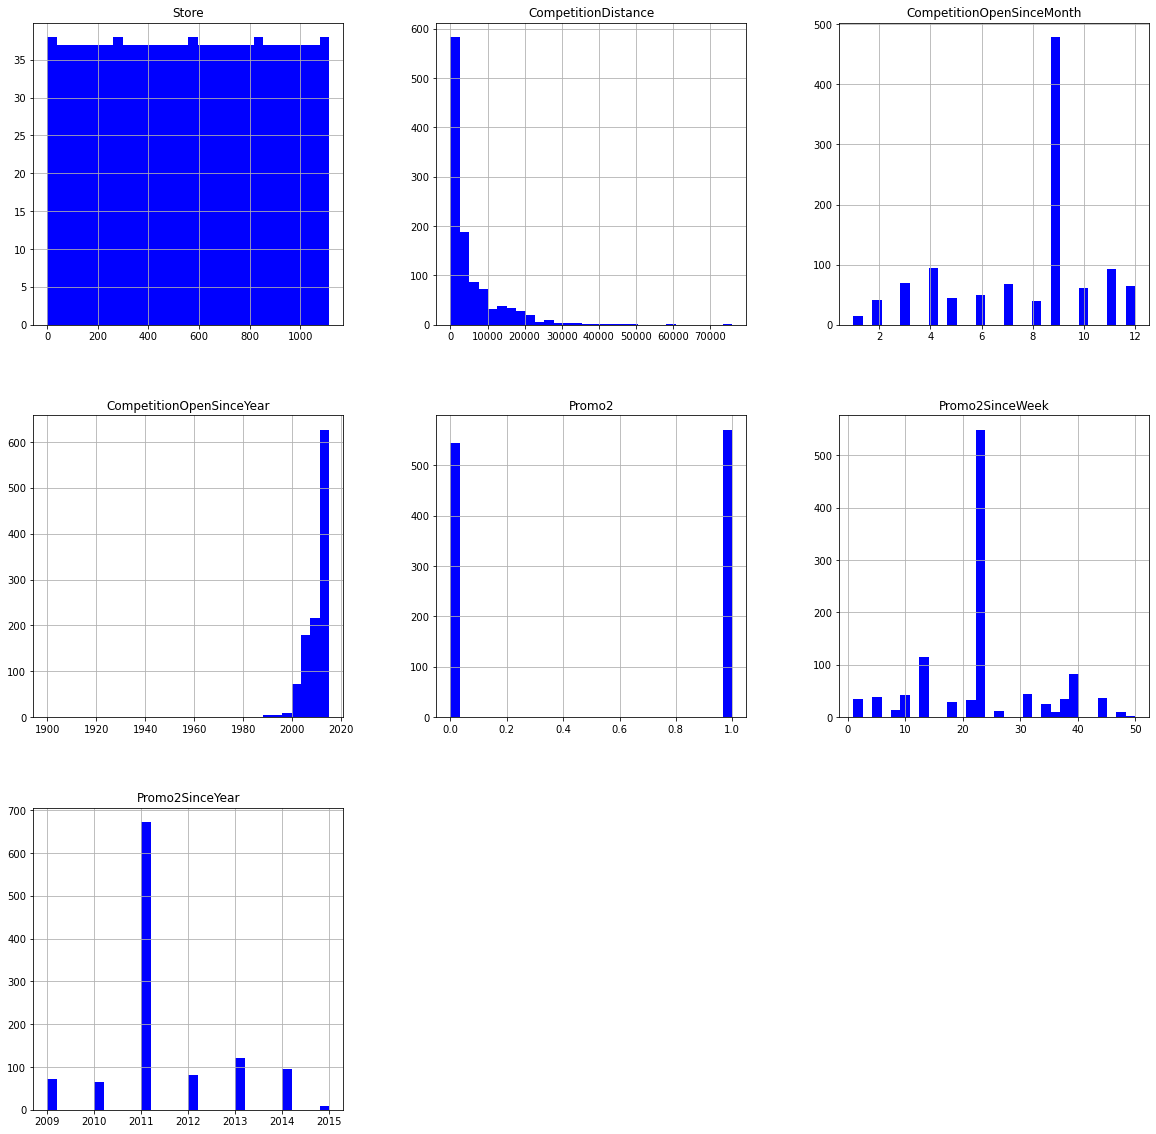

In [58]:
store_df.hist(bins=30,color="b",figsize=(20,20))

In [59]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0
1,2,a,a,570.0,11.0,2007.0,1,13.000000,2010.0
2,3,a,a,14130.0,12.0,2006.0,1,14.000000,2011.0
3,4,c,c,620.0,9.0,2009.0,0,23.595447,2011.0
4,5,a,a,29910.0,4.0,2015.0,0,23.595447,2011.0


In [60]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [61]:
df = pd.merge(sales_train_df,store_df,how="inner",on="Store")

In [62]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0


In [63]:
cor = df.corr()

<AxesSubplot:>

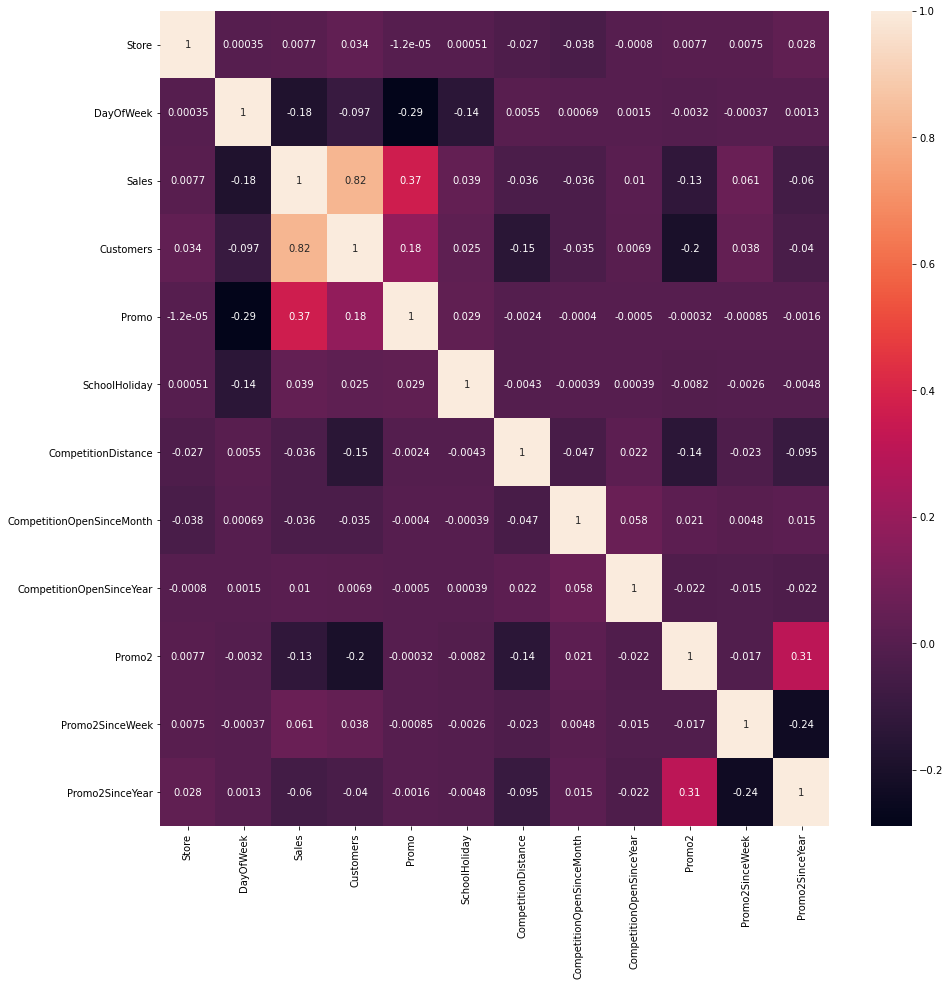

In [64]:
plt.figure(figsize=(15,15))
sns.heatmap(data=cor, annot=True)

In [65]:
df.corr()["Sales"].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.061270
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.010492
Store                        0.007710
CompetitionDistance         -0.035851
CompetitionOpenSinceMonth   -0.036182
Promo2SinceYear             -0.059533
Promo2                      -0.127596
DayOfWeek                   -0.178736
Name: Sales, dtype: float64

In [66]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0


In [67]:
df["Year"] = pd.DatetimeIndex(df["Date"]).year

In [68]:
df["Month"] = pd.DatetimeIndex(df["Date"]).month

In [69]:
df["Day"] = pd.DatetimeIndex(df["Date"]).day

In [70]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,2015,7,27


<AxesSubplot:xlabel='Month'>

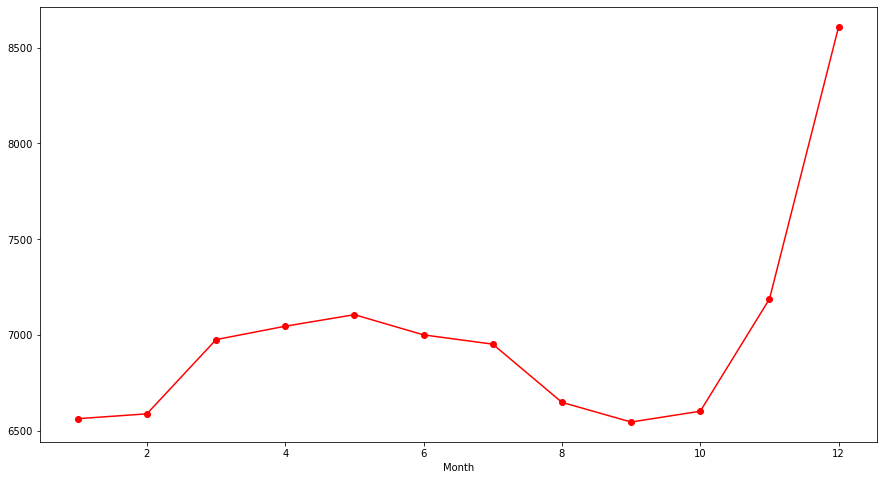

In [71]:
# Sales per month
plt.figure(figsize=(15,8))
df.groupby("Month")["Sales"].mean().plot(marker="o",color="r")

<AxesSubplot:xlabel='Month'>

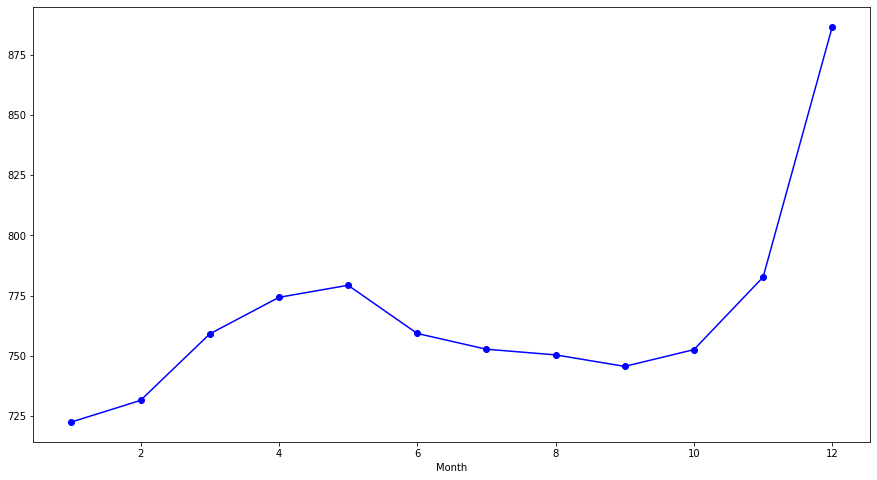

In [72]:
# CUstomers per month
plt.figure(figsize=(15,8))
df.groupby("Month")["Customers"].mean().plot(marker="o",color="b")

<AxesSubplot:xlabel='Year'>

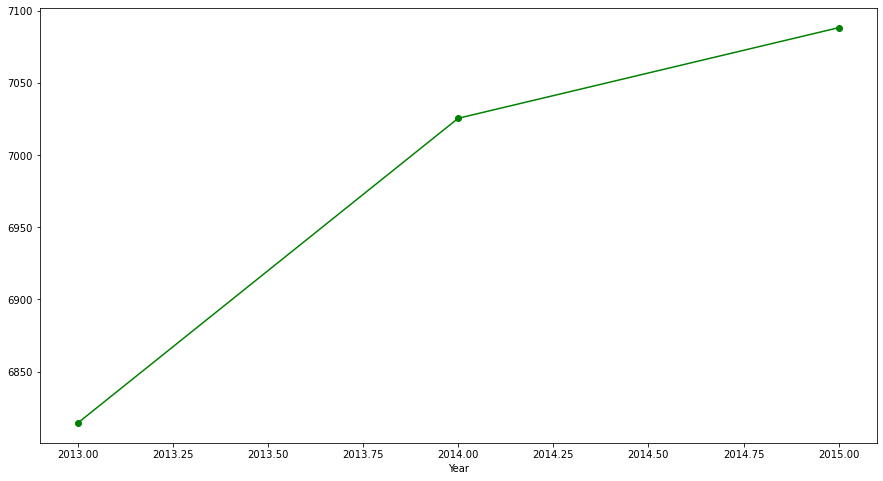

In [73]:
# Sales per year
plt.figure(figsize=(15,8))
df.groupby("Year")["Sales"].mean().plot(marker="o",color="g")

<AxesSubplot:xlabel='Year'>

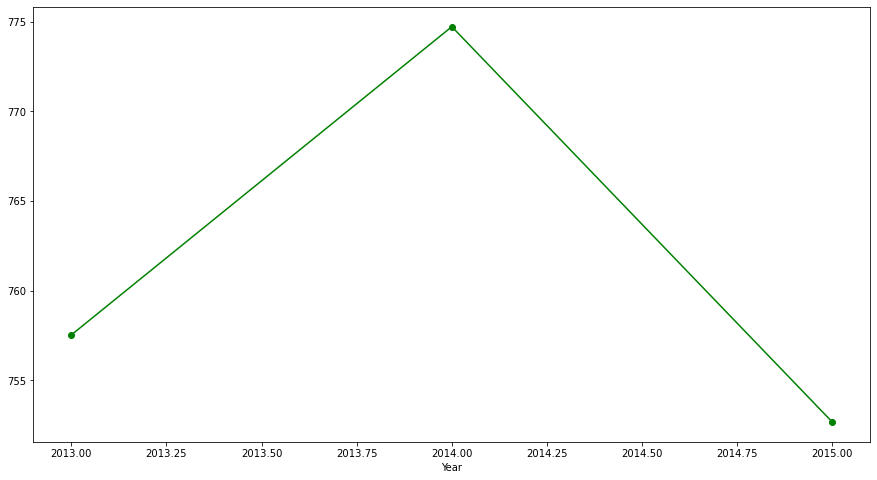

In [74]:
# Sales per year
plt.figure(figsize=(15,8))
df.groupby("Year")["Customers"].mean().plot(marker="o",color="g")

<AxesSubplot:xlabel='Day'>

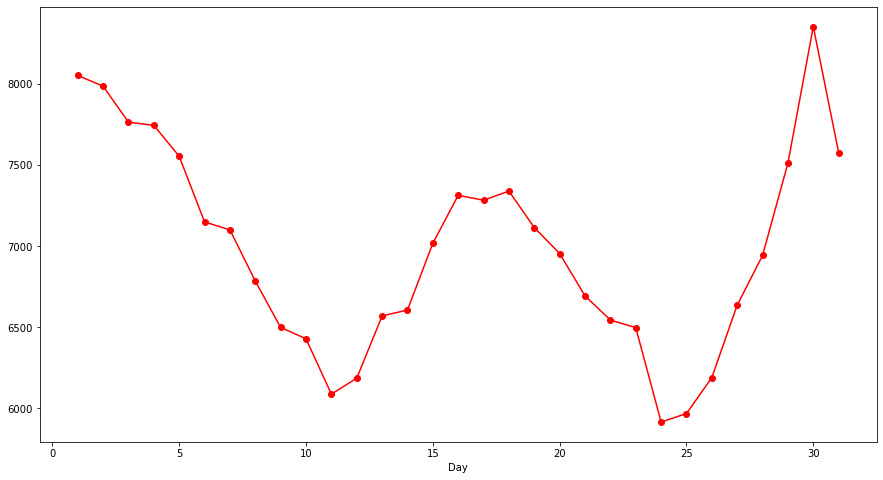

In [75]:
# Sales per month
plt.figure(figsize=(15,8))
df.groupby("Day")["Sales"].mean().plot(marker="o",color="r")

<AxesSubplot:xlabel='Day'>

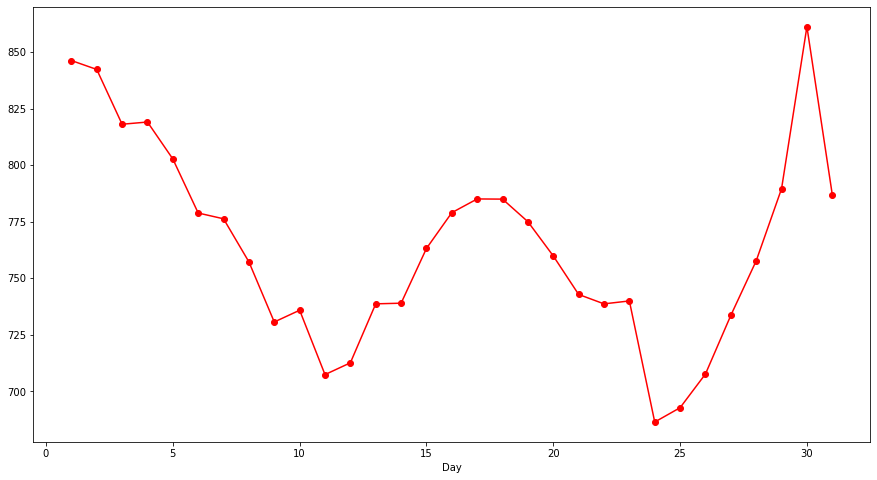

In [76]:
# Sales per month
plt.figure(figsize=(15,8))
df.groupby("Day")["Customers"].mean().plot(marker="o",color="r")

In [77]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,2015,7,27


<AxesSubplot:xlabel='DayOfWeek'>

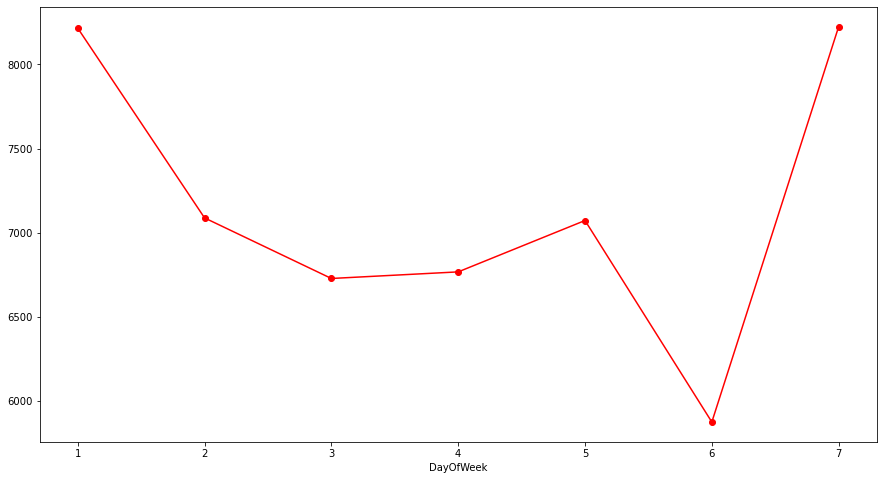

In [78]:
# Sales per month
plt.figure(figsize=(15,8))
df.groupby("DayOfWeek")["Sales"].mean().plot(marker="o",color="r")

<AxesSubplot:xlabel='DayOfWeek'>

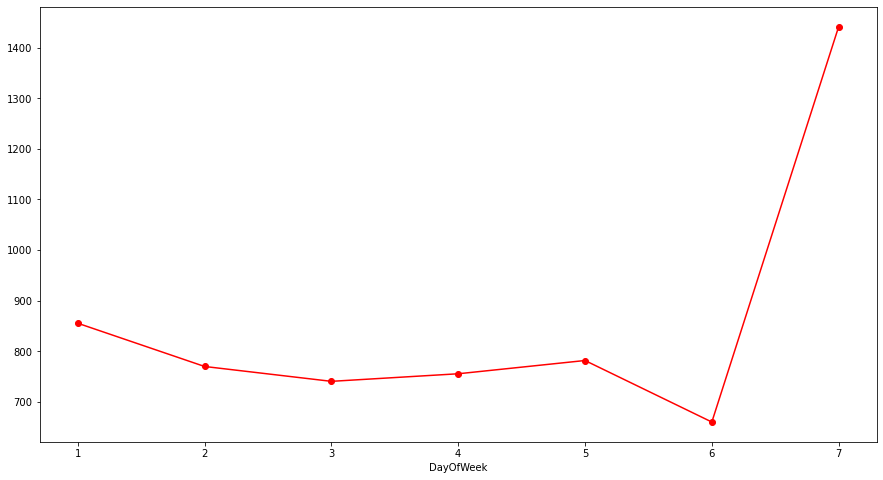

In [79]:
# Sales per month
plt.figure(figsize=(15,8))
df.groupby("DayOfWeek")["Customers"].mean().plot(marker="o",color="r")

<AxesSubplot:xlabel='Date'>

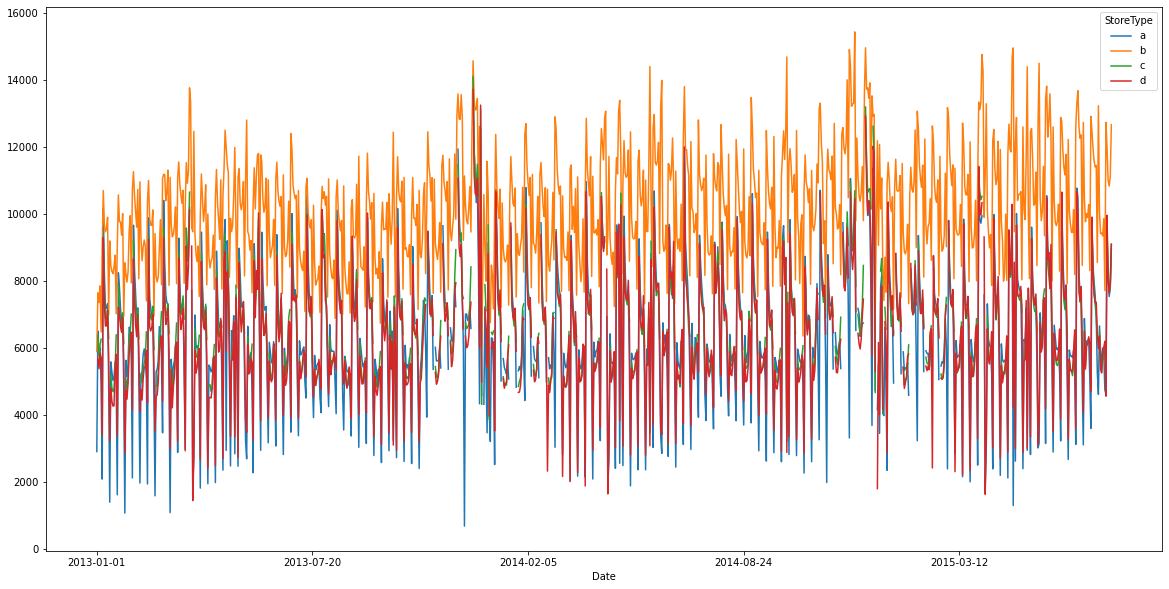

In [80]:
fig, ax = plt.subplots(figsize=(20,10))    

df.groupby(["Date","StoreType"]).mean()["Sales"].unstack().plot(ax = ax)

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

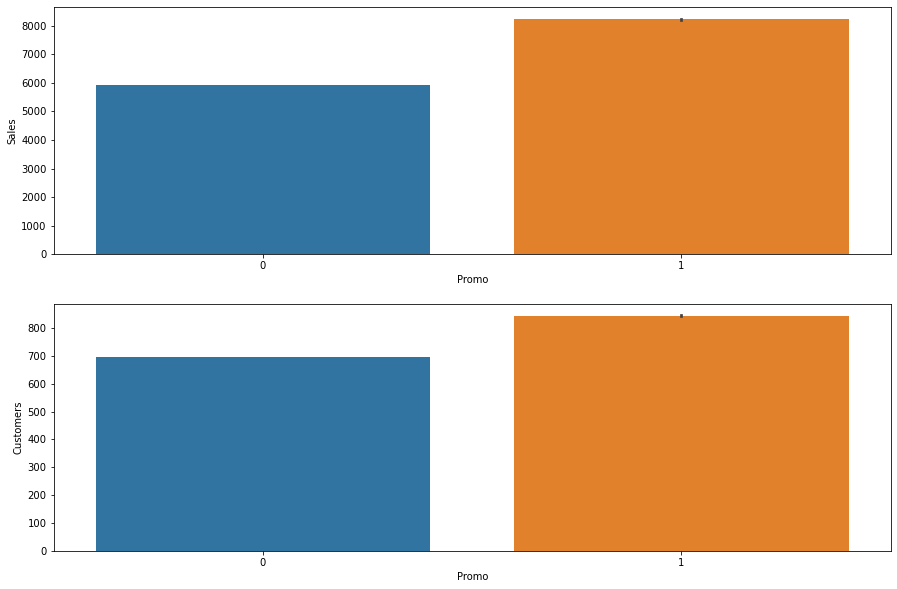

In [81]:
plt.figure(figsize=([15,10]))

plt.subplot(211)

sns.barplot(x="Promo",y="Sales",data=df)

plt.subplot(212)

sns.barplot(x="Promo",y="Customers",data=df)

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

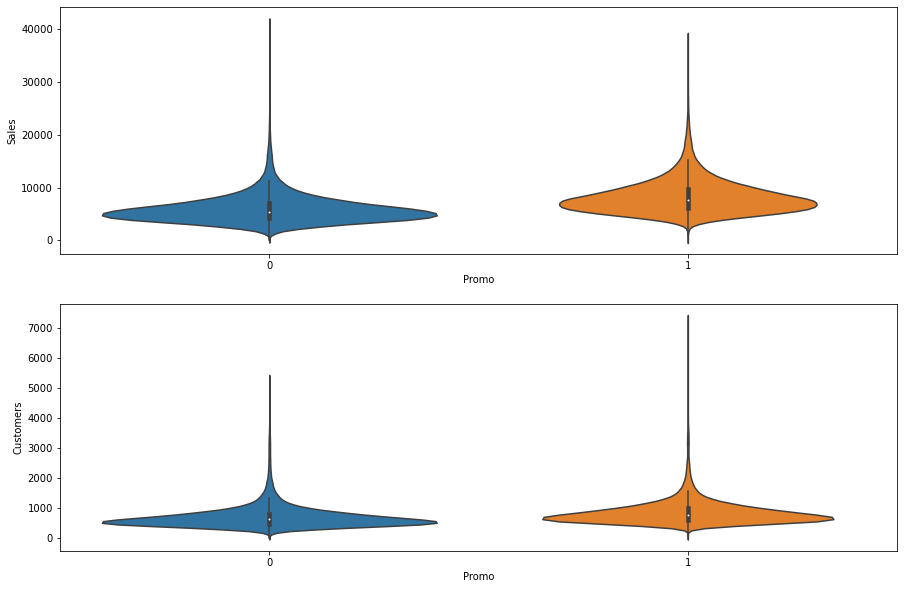

In [82]:
plt.figure(figsize=([15,10]))

plt.subplot(211)

sns.violinplot(x="Promo",y="Sales",data=df)

plt.subplot(212)

sns.violinplot(x="Promo",y="Customers",data=df)

### FaceBook Prophet

- Prophet is an open source software released by facebooks core datascience team 


- Prophet is a procedure for forcasting time series data based on additive model where non linear trends are fit with yearly, weekly and daily seasonality plus holiday effects.


- Prophet works best with time series that have strong seasonal effects and several seasons of historical data

### Integrating FaceBook Prophet

In [83]:
# import prophet
from fbprophet import Prophet

In [100]:
# creating a function

def sales_prediction(Store_ID, data, Periods):
    
    # creating a variable
    
    data = data[data["Store"] == Store_ID]
    
    data = data[["Date","Sales"]].rename(columns={"Date":"ds","Sales":"y"})
    
    data = data.sort_values("ds")
    
    Fp = Prophet(daily_seasonality=True)
    
    Fp.fit(data)
    
    future = Fp.make_future_dataframe(periods=Periods)
    
    forecast = Fp.predict(future)
    
    figure = Fp.plot(forecast, xlabel="Date", ylabel="Sales")
    
    figure_2 = Fp.plot_components(forecast)

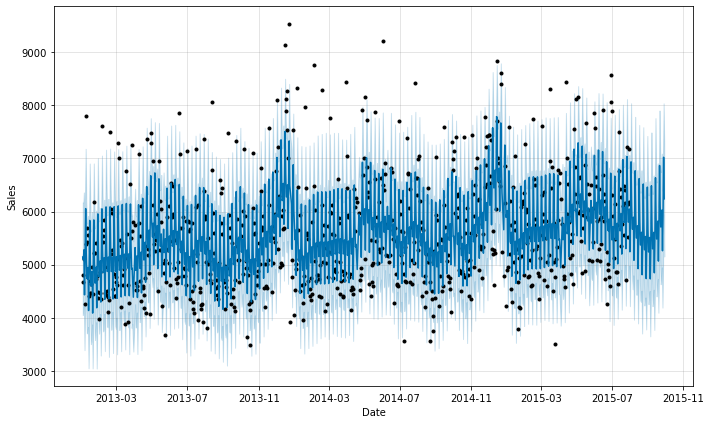

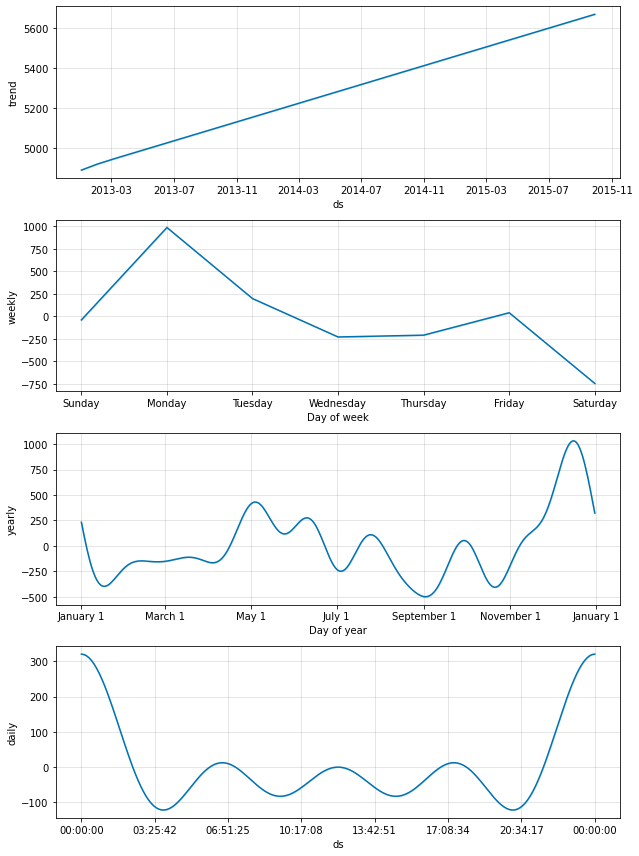

In [101]:
sales_prediction(10, df, 60)

In [123]:
# creating a function

def sales_prediction_holi(Store_ID, data, holidays, Periods):
    
    # creating a variable
    
    data = data[data["Store"] == Store_ID]
    
    data = data[["Date","Sales"]].rename(columns={"Date":"ds","Sales":"y"})
    
    data = data.sort_values("ds")
    
    Fp = Prophet(daily_seasonality=True,holidays=holidays)
    
    Fp.fit(data)
    
    future = Fp.make_future_dataframe(periods=Periods)
    
    forecast = Fp.predict(future)
    
    figure = Fp.plot(forecast, xlabel="Date", ylabel="Sales")
    
    figure_2 = Fp.plot_components(forecast)

In [103]:
school_holidays = df[df["SchoolHoliday"] == 1].loc[:,"Date"].values

In [105]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [106]:
school_holidays.shape

(163457,)

In [111]:
df["StateHoliday"].value_counts()

0    731342
0    112140
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [112]:
st_holidays = df[(df["StateHoliday"] == "a") | (df["StateHoliday"] == "b") | (df["StateHoliday"] == "c")].loc[:,"Date"].values

In [113]:
st_holidays.shape

(910,)

In [115]:
stat_holiday = pd.DataFrame({"ds":pd.to_datetime(st_holidays),
                            "holiday": "State Holiday"})

In [116]:
stat_holiday.head()

,ds,holiday
0,2014-10-03,State Holiday
1,2013-10-03,State Holiday
2,2015-06-04,State Holiday
3,2014-06-19,State Holiday
4,2013-05-30,State Holiday


In [117]:
school_holidays_df = pd.DataFrame({"ds":pd.to_datetime(school_holidays),
                                  "holiday": "School Holiday"})

In [118]:
school_holidays_df.head()

,ds,holiday
0,2015-07-31,School Holiday
1,2015-07-30,School Holiday
2,2015-07-29,School Holiday
3,2015-07-28,School Holiday
4,2015-07-27,School Holiday


In [120]:
holy_all = pd.concat((stat_holiday,school_holidays_df))

In [121]:
holy_all.head()

,ds,holiday
0,2014-10-03,State Holiday
1,2013-10-03,State Holiday
2,2015-06-04,State Holiday
3,2014-06-19,State Holiday
4,2013-05-30,State Holiday


In [122]:
holy_all["holiday"].value_counts()

School Holiday    163457
State Holiday        910
Name: holiday, dtype: int64

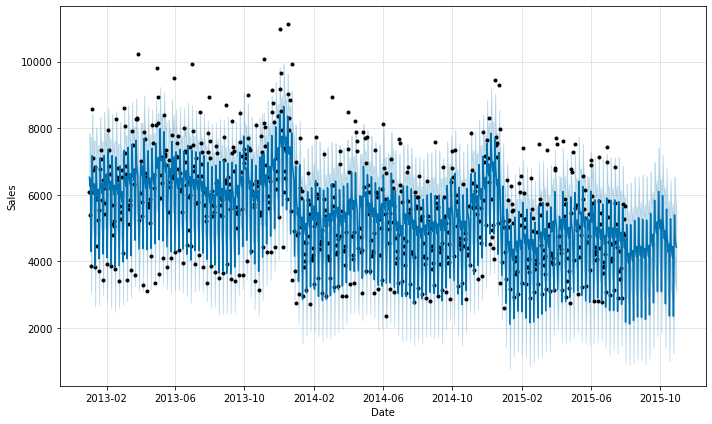

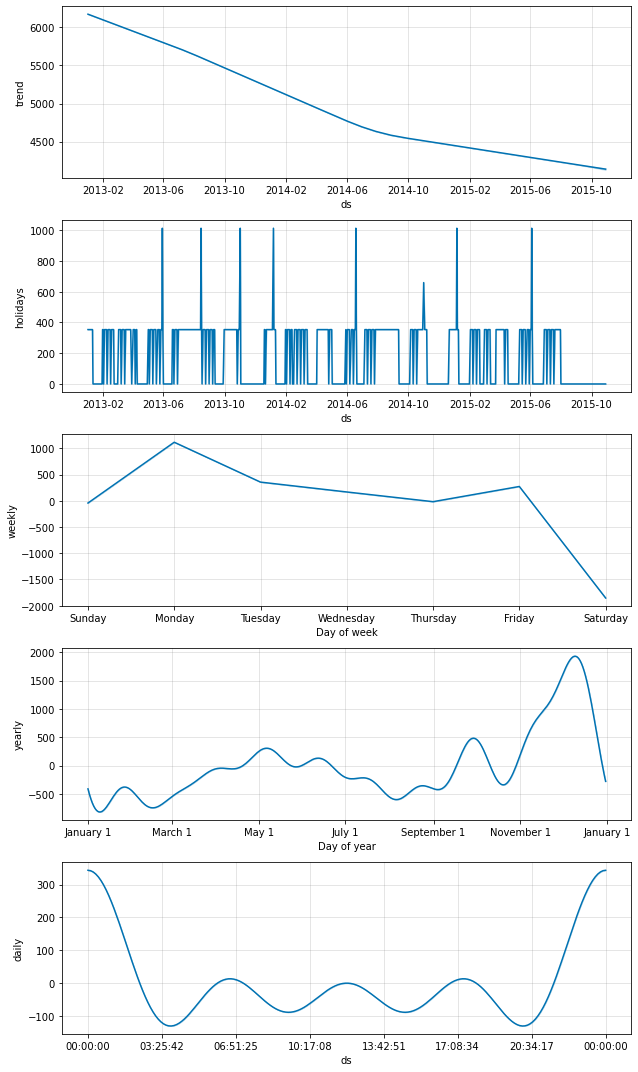

In [124]:
sales_prediction_holi(6, df, holy_all, 90)